# Imports

Import basic libraries and csv files

In [4]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style = 'white')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import PReLU
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [6]:
# get data file names
path =r'/content/drive/MyDrive/Feature Collections/5 day timestep'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
data = pd.concat(dfs, ignore_index=True)
data = data.sort_values(by = 'Date')

data

,Unnamed: 0,Date,elevation,forecast_albedo,skin_temperature,surface_solar_radiation_downwards,total_precipitation,snow_acc,snowmelt_calc
343,35,1475280000000,5658,0.423656,275.049384,1.506655e+07,0.010154,0.010154,0.100083
342,34,1475280000000,6112,0.490032,274.207912,1.543651e+07,0.010066,0.010067,0.109620
341,33,1475280000000,4928,0.358844,278.001125,1.501043e+07,0.009773,0.009775,0.076139
340,32,1475280000000,4625,0.567084,274.313625,1.463809e+07,0.006371,0.006376,0.077216
339,31,1475280000000,5212,0.362190,277.477932,1.468921e+07,0.010119,0.010121,0.225848
...,...,...,...,...,...,...,...,...,...
7991,7405,1616716800000,2052,0.535436,274.752518,1.692974e+07,0.006241,0.006887,0.062054
7992,7408,1616716800000,1582,0.223566,281.103023,1.705455e+07,0.004372,0.004813,0.177646
7993,7414,1616716800000,4625,0.816592,268.618811,1.848872e+07,0.007975,0.008806,0.033757
7994,7418,1616716800000,4389,0.665660,270.733231,1.685475e+07,0.001439,0.001607,0.006784


# Data preprocessing

In [7]:
dt = data
# dt = dt[dt['snowmelt_calc']!=0]
dt[['skin_temperature','elevation','surface_solar_radiation_downwards']] = (dt[['skin_temperature','elevation','surface_solar_radiation_downwards']] - dt[['skin_temperature','elevation','surface_solar_radiation_downwards']].min())/(dt[['skin_temperature','elevation','surface_solar_radiation_downwards']].max() - dt[['skin_temperature','elevation','surface_solar_radiation_downwards']].min())
dt.head()

,Unnamed: 0,Date,elevation,forecast_albedo,skin_temperature,surface_solar_radiation_downwards,total_precipitation,snow_acc,snowmelt_calc
343,35,1475280000000,0.899779,0.423656,0.822242,0.600889,0.010154,0.010154,0.100083
342,34,1475280000000,1.000000,0.490032,0.803830,0.619687,0.010066,0.010067,0.109620
341,33,1475280000000,0.738631,0.358844,0.886828,0.598037,0.009773,0.009775,0.076139
340,32,1475280000000,0.671744,0.567084,0.806144,0.579118,0.006371,0.006376,0.077216
339,31,1475280000000,0.801325,0.362190,0.875380,0.581716,0.010119,0.010121,0.225848


In [8]:
X = dt[['skin_temperature','elevation','forecast_albedo','surface_solar_radiation_downwards','total_precipitation','snow_acc']]
y = dt['snowmelt_calc']

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=122,
                                                    shuffle = False)
print("Labels for training and testing data")
print(train_y)
print(test_y)

Labels for training and testing data
343     0.100083
342     0.109620
341     0.076139
340     0.077216
339     0.225848
          ...   
5871    0.055161
5058    0.000000
5140    0.000000
4959    0.000000
5050    0.000000
Name: snowmelt_calc, Length: 5597, dtype: float64
5079    0.000000
4903    0.000000
5872    0.030376
5873    0.048611
4992    0.000000
          ...   
7991    0.062054
7992    0.177646
7993    0.033757
7994    0.006784
7996    0.001224
Name: snowmelt_calc, Length: 2400, dtype: float64


In [9]:
train_X

,skin_temperature,elevation,forecast_albedo,surface_solar_radiation_downwards,total_precipitation,snow_acc
343,0.822242,0.899779,0.423656,0.600889,0.010154,0.010154
342,0.803830,1.000000,0.490032,0.619687,0.010066,0.010067
341,0.886828,0.738631,0.358844,0.598037,0.009773,0.009775
340,0.806144,0.671744,0.567084,0.579118,0.006371,0.006376
339,0.875380,0.801325,0.362190,0.581716,0.010119,0.010121
...,...,...,...,...,...,...
5871,0.681822,0.564459,0.627304,0.224765,0.006597,0.006785
5058,0.378740,1.000000,0.836274,0.411700,0.000831,0.000871
5140,0.501604,0.817439,0.850002,0.361446,0.000492,0.000506
4959,0.476749,0.935541,0.850523,0.344039,0.000573,0.000606


In [10]:
train_X.shape

(5597, 6)

# Model creation and testing

## Model architecture

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 60)               5940      
 l)                                                              
                                                                 
 p_re_lu (PReLU)             (None, 60)                60        
                                                                 
 dense (Dense)               (None, 64)                3904      
                                                                 
 p_re_lu_1 (PReLU)           (None, 64)                64        
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,033
Trainable params: 10,033
Non-trainable params: 0
____________________________________________________

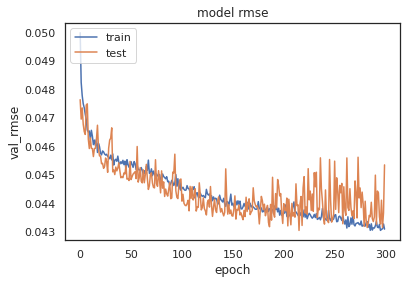

0.0430942177772522 0.045348405838012695


In [11]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# create and fit the LSTM network
model = Sequential()
model.add(Bidirectional(GRU(30),input_shape = (6,1)))
model.add(PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None))
model.add(Dense(64,activation = None))
model.add(PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None))
model.add(Dense(1,activation = 'gelu'))
reduce_lr = ReduceLROnPlateau(monitor='loss', mode ='min',factor=0.4,
                              patience=10, min_lr=0.000000001)
checkpoint_filepath = '/content/temp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_root_mean_squared_error',
    mode='min',
    save_best_only=True)

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0006),
              metrics=['RootMeanSquaredError'])
print(model.summary())
history = model.fit(train_X, train_y,callbacks = [model_checkpoint_callback],validation_split=0.3, epochs=300, verbose=0)
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model rmse')
plt.ylabel('val_rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(history.history['root_mean_squared_error'][-1],history.history['val_root_mean_squared_error'][-1])

## Model results and testing

In [30]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Models/5_day_model')

In [31]:
# model.load_weights(checkpoint_filepath)

In [32]:
# Model prediction
temp= model.predict(test_X)
temp[temp<0]=0

#Results Stats
import math
from sklearn.metrics import mean_squared_error # MSE
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import r2_score#R square

mse = mean_squared_error(test_y,temp)
rmse = math.sqrt(mse)
mae = mean_absolute_error(test_y,temp)
r2 = r2_score(test_y,temp)
norm_rmse = rmse/(float(dt['snowmelt_calc'].max()-dt['snowmelt_calc'].min()))

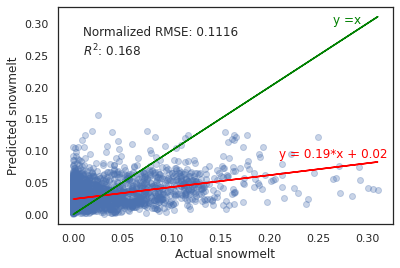

In [37]:
#Visualization of results
plt.scatter(test_y,temp,cmap = 'virdis',alpha = 0.3)
m, b = np.polyfit(test_y, temp, 1)
# Slope and intercept of polyfit line
slope = float(m)
intercept = float(b)

plt.xlabel('Actual snowmelt')
plt.ylabel('Predicted snowmelt')
plt.plot(test_y, m*test_y + b,color = 'red')
plt.plot(test_y, 1*test_y + 0,color = 'green')
plt.text(0.01,0.25, 'Normalized RMSE: '+str(np.round(norm_rmse,4))+'\n$R^2$: '+str(np.round(r2,3)))
plt.text(0.21,0.09, 'y = '+str(round(slope,2))+'*x + '+str(round(intercept,2)),color = 'red',fontsize = 12)
plt.text(0.265,0.3, 'y =x',fontsize = 12,color = 'green')
plt.savefig('5_day_graph.tif',dpi = 300)
plt.show()

In [34]:
print('MSE:',mse,'\nRMSE:',rmse,'\nMAE:',mae,'\nR2:',r2,'\nNormalized RMSE:',norm_rmse,'\nSlope:',m,'\nIntercept:',b)

MSE: 0.0017971705952269223 
RMSE: 0.04239304890223068 
MAE: 0.02945681661566836 
R2: 0.16796320513751672 
Normalized RMSE: 0.11163262275354074 
Slope: [0.18772322] 
Intercept: [0.0241311]


In [29]:
# model.save('/content/drive/MyDrive/Models/5_day_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/5_day_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/5_day_model/assets
